In [25]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist #28 28 0-9 image
(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)#normalize
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()#simple feed-forward
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#flatten
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3204 - acc: 0.9087
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1146 - acc: 0.9647
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0790 - acc: 0.9750
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0582 - acc: 0.9811
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0455 - acc: 0.9851


In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap= plt.cm.binary)#cm represent color map
plt.show()
print(x_train[0]) #image into numeric or tensor


In [27]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0953 - acc: 0.9729
0.09530388753646984 0.9729


In [0]:
model.save('mnist_num_reader.model') #save

In [0]:
new_model = tf.keras.models.load_model('mnist_num_reader.model') #reloadmodel

In [0]:
prediction = new_model.predict([x_test])

In [35]:
print(prediction) #this is not in appropriate form so lets see with matploit lib for first character

[[1.1101640e-07 2.6690577e-08 1.0601598e-05 ... 3.1977031e-13
  7.8418451e-13 2.0441931e-13]
 [5.4090504e-12 2.2585394e-07 9.9999976e-01 ... 2.2946645e-20
  4.1786079e-21 2.3596248e-20]
 [1.1895633e-08 9.9982506e-01 5.6396257e-06 ... 9.7742381e-10
  1.0721594e-10 1.5480939e-10]
 ...
 [5.4295363e-11 4.0518458e-08 3.3464986e-09 ... 2.4818645e-13
  2.3362502e-13 1.4584285e-13]
 [5.1979395e-08 1.8515875e-08 2.4258201e-08 ... 2.0698561e-14
  2.9031075e-14 6.6554015e-14]
 [2.8174933e-08 1.9940443e-09 1.0668619e-07 ... 7.5661408e-18
  1.8480484e-17 5.5242662e-17]]


In [36]:
import numpy as np

print(np.argmax(prediction[0]))

7


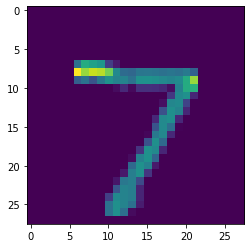

In [37]:
plt.imshow(x_test[0])
plt.show()